In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v27
from Resources.Game import *


In [3]:
model = Model_v27()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v27')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v27/model_{}_batches'.format(newest_model)))
criterion = nn.MSELoss()

n_games         = 1500 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [4]:
val_mean_list = []
val_median_list = []
val_std_list = []

curr_ind = 0

validation_error_list = []
hist_active_1 = []
hist_active_20 = []
hist_active_50 = []
hist_active_100 = []
hist_active_150 = []


validation error for model_batch 10: 0.6182418465614319
validation error for model_batch 20: 0.6291872262954712
validation error for model_batch 30: 0.5973631739616394
validation error for model_batch 40: 0.5701930522918701
validation error for model_batch 50: 0.5873895883560181
validation error for model_batch 60: 0.5154280662536621
validation error for model_batch 70: 0.4933905005455017
validation error for model_batch 80: 0.5387148857116699
validation error for model_batch 90: 0.5080451369285583
validation error for model_batch 100: 0.4331153929233551


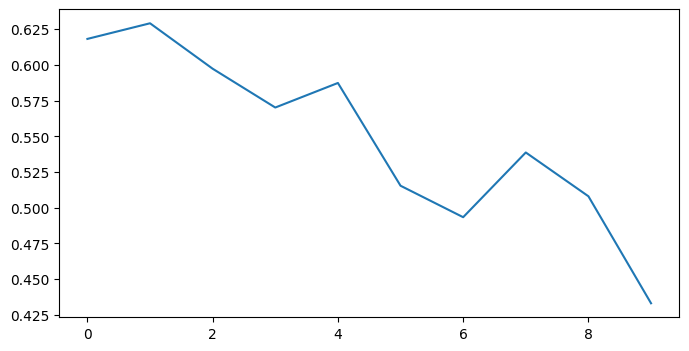

validation error for model_batch 110: 0.45827117562294006
validation error for model_batch 120: 0.47119179368019104
validation error for model_batch 130: 0.4664832055568695
validation error for model_batch 140: 0.4317704439163208
validation error for model_batch 150: 0.4118524491786957
validation error for model_batch 160: 0.39776724576950073
validation error for model_batch 170: 0.3856407403945923
validation error for model_batch 180: 0.46290645003318787
validation error for model_batch 190: 0.4141606390476227
validation error for model_batch 200: 0.43923670053482056


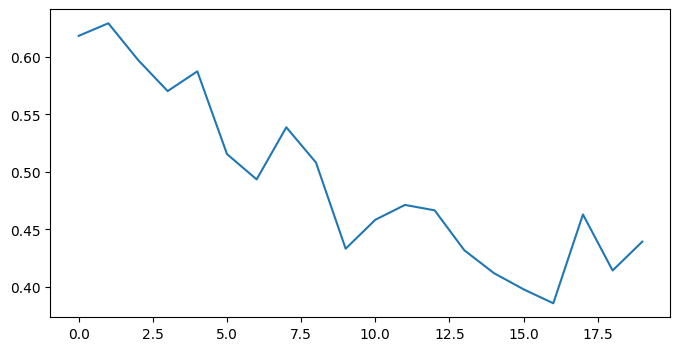

validation error for model_batch 210: 0.40802669525146484
validation error for model_batch 220: 0.3967399001121521
validation error for model_batch 230: 0.4286518394947052
validation error for model_batch 240: 0.4274432957172394
validation error for model_batch 250: 0.4137040972709656
validation error for model_batch 260: 0.3942757844924927
validation error for model_batch 270: 0.40147164463996887
validation error for model_batch 280: 0.3931272029876709
validation error for model_batch 290: 0.4012458622455597
validation error for model_batch 300: 0.3895145654678345


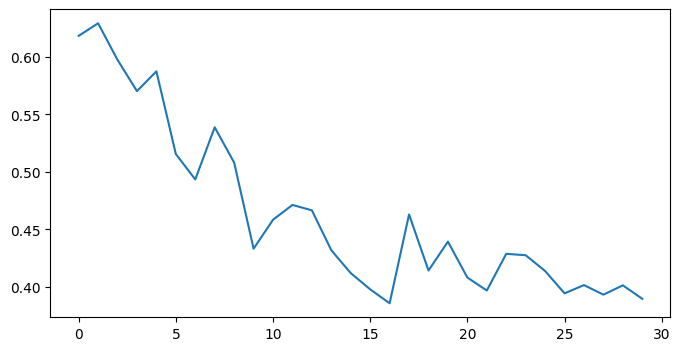

validation error for model_batch 310: 0.39490807056427
validation error for model_batch 320: 0.34090515971183777
validation error for model_batch 330: 0.35299205780029297
validation error for model_batch 340: 0.34791213274002075
validation error for model_batch 350: 0.3862841725349426
validation error for model_batch 360: 0.37301257252693176
validation error for model_batch 370: 0.35410377383232117
validation error for model_batch 380: 0.3349759876728058
validation error for model_batch 390: 0.3925613760948181
validation error for model_batch 400: 0.33142030239105225


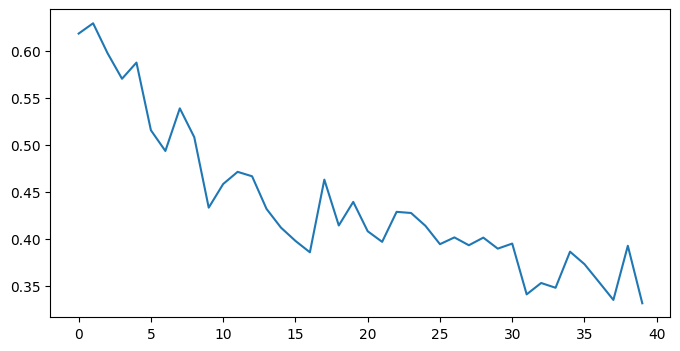

validation error for model_batch 410: 0.35513806343078613
validation error for model_batch 420: 0.3344738781452179
validation error for model_batch 430: 0.3368161618709564
validation error for model_batch 440: 0.3323189318180084
validation error for model_batch 450: 0.33102133870124817
validation error for model_batch 460: 0.33691078424453735
validation error for model_batch 470: 0.3258383572101593
validation error for model_batch 480: 0.35587185621261597
validation error for model_batch 490: 0.3290902376174927
validation error for model_batch 500: 0.3308776617050171


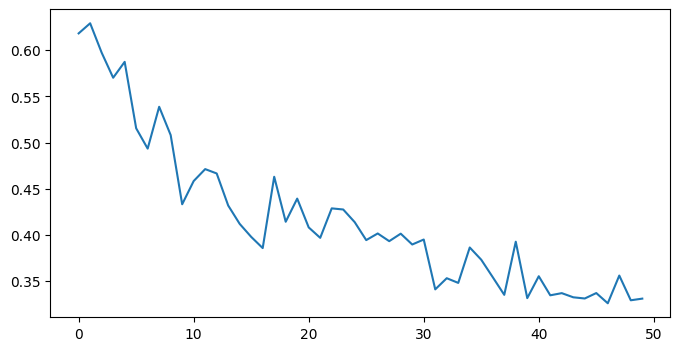

validation error for model_batch 510: 0.3206711411476135
validation error for model_batch 520: 0.3377847969532013
validation error for model_batch 530: 0.33181968331336975
validation error for model_batch 540: 0.34536728262901306
validation error for model_batch 550: 0.33124199509620667
validation error for model_batch 560: 0.3488621711730957
validation error for model_batch 570: 0.35451579093933105
validation error for model_batch 580: 0.3632550835609436
validation error for model_batch 590: 0.3497175872325897
validation error for model_batch 600: 0.3432733118534088


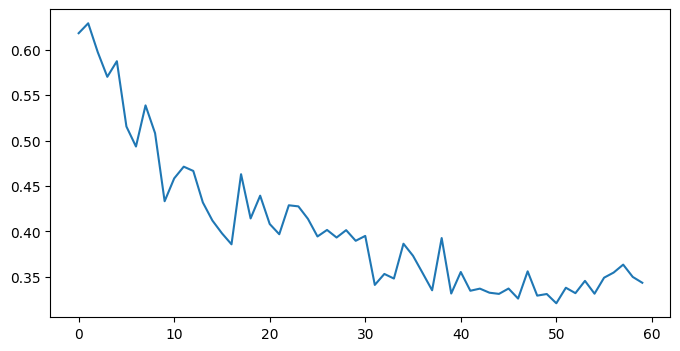

validation error for model_batch 610: 0.32153427600860596
validation error for model_batch 620: 0.3533152639865875
validation error for model_batch 630: 0.33870208263397217
validation error for model_batch 640: 0.35951730608940125
validation error for model_batch 650: 0.33778315782546997
validation error for model_batch 660: 0.3346467912197113
validation error for model_batch 670: 0.34439817070961
validation error for model_batch 680: 0.3501485586166382
validation error for model_batch 690: 0.3340253233909607
validation error for model_batch 700: 0.35276660323143005


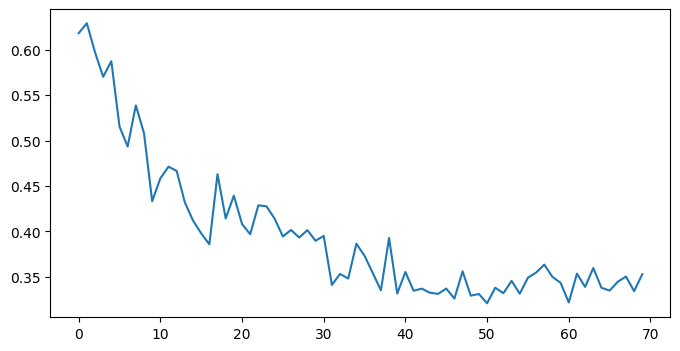

validation error for model_batch 710: 0.3718101382255554
validation error for model_batch 720: 0.37382572889328003
validation error for model_batch 730: 0.3281843364238739
validation error for model_batch 740: 0.32496002316474915
validation error for model_batch 750: 0.36422255635261536
validation error for model_batch 760: 0.35002607107162476
validation error for model_batch 770: 0.36241862177848816
validation error for model_batch 780: 0.3336302936077118
validation error for model_batch 790: 0.34979403018951416
validation error for model_batch 800: 0.3385982811450958


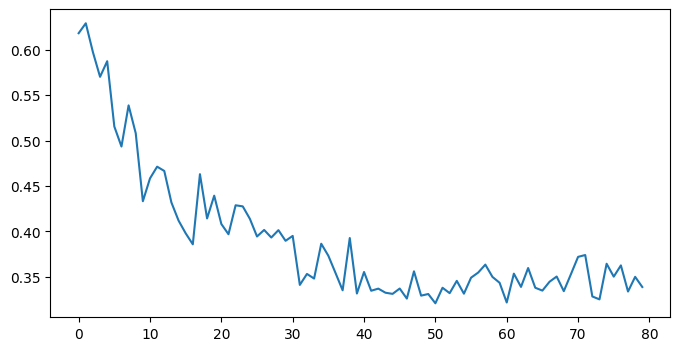

validation error for model_batch 810: 0.3323974013328552
validation error for model_batch 820: 0.317543625831604
validation error for model_batch 830: 0.328057199716568
validation error for model_batch 840: 0.3314429521560669
validation error for model_batch 850: 0.3374648988246918
validation error for model_batch 860: 0.31668028235435486
validation error for model_batch 870: 0.3166523873806
validation error for model_batch 880: 0.3490685224533081
validation error for model_batch 890: 0.3500402569770813
validation error for model_batch 900: 0.3428504467010498


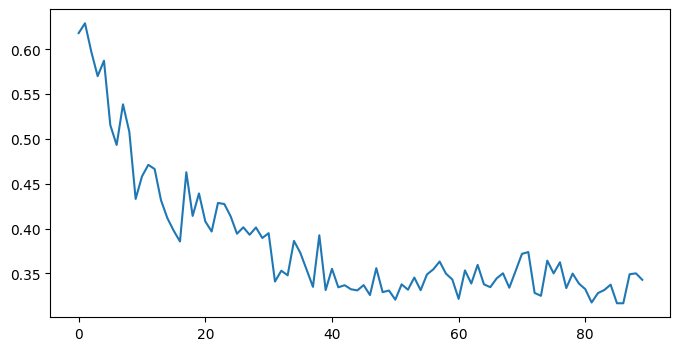

validation error for model_batch 910: 0.3514365255832672
validation error for model_batch 920: 0.3783196806907654
validation error for model_batch 930: 0.3508692681789398
validation error for model_batch 940: 0.37361180782318115
validation error for model_batch 950: 0.32807570695877075
validation error for model_batch 960: 0.3422563076019287
validation error for model_batch 970: 0.3465745449066162
validation error for model_batch 980: 0.36189964413642883
validation error for model_batch 990: 0.3509432375431061
validation error for model_batch 1000: 0.34313908219337463


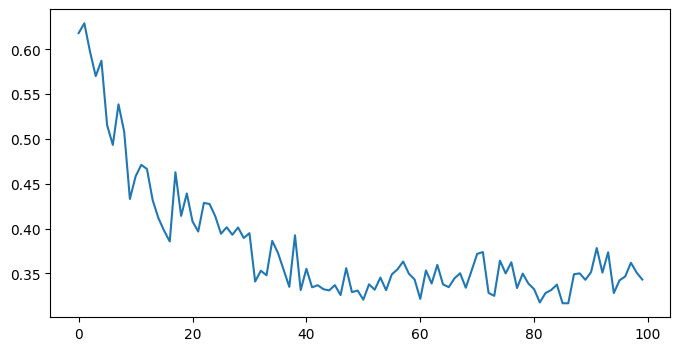

validation error for model_batch 1010: 0.33885136246681213
validation error for model_batch 1020: 0.3665924072265625
validation error for model_batch 1030: 0.35552939772605896
validation error for model_batch 1040: 0.3661261200904846
validation error for model_batch 1050: 0.3714868426322937
validation error for model_batch 1060: 0.3549738824367523
validation error for model_batch 1070: 0.35898616909980774
validation error for model_batch 1080: 0.3704579770565033
validation error for model_batch 1090: 0.3551841974258423
validation error for model_batch 1100: 0.32472121715545654


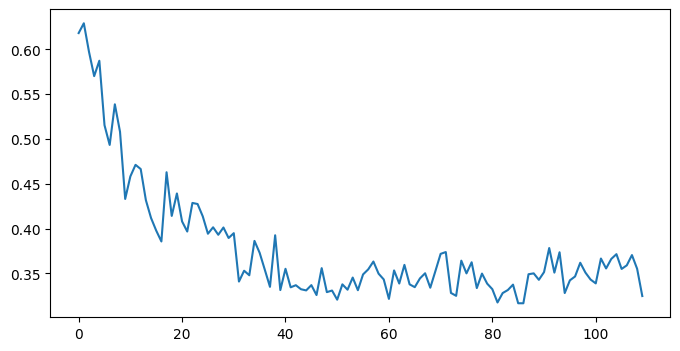

validation error for model_batch 1110: 0.3498688042163849
validation error for model_batch 1120: 0.33108317852020264
validation error for model_batch 1130: 0.3067602515220642
validation error for model_batch 1140: 0.34526747465133667
validation error for model_batch 1150: 0.358026385307312
validation error for model_batch 1160: 0.34170833230018616
validation error for model_batch 1170: 0.33845633268356323
validation error for model_batch 1180: 0.33404427766799927
validation error for model_batch 1190: 0.34848037362098694
validation error for model_batch 1200: 0.3626266121864319


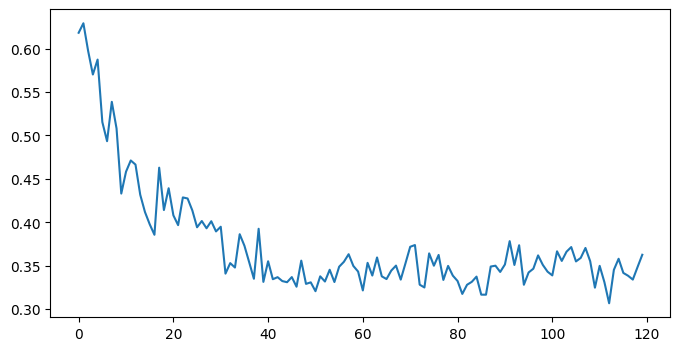

validation error for model_batch 1210: 0.3589158356189728
validation error for model_batch 1220: 0.35384508967399597
validation error for model_batch 1230: 0.35964980721473694
validation error for model_batch 1240: 0.3363361954689026
validation error for model_batch 1250: 0.35223427414894104
validation error for model_batch 1260: 0.31645795702934265
validation error for model_batch 1270: 0.34798675775527954
validation error for model_batch 1280: 0.3697960674762726
validation error for model_batch 1290: 0.3513031005859375
validation error for model_batch 1300: 0.35848352313041687


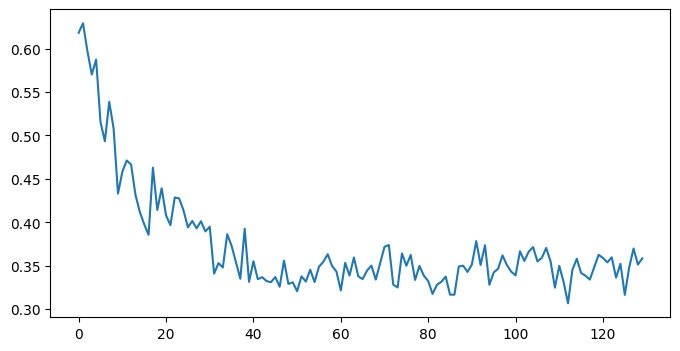

validation error for model_batch 1310: 0.36067280173301697
validation error for model_batch 1320: 0.34573033452033997
validation error for model_batch 1330: 0.34961387515068054
validation error for model_batch 1340: 0.3652438819408417
validation error for model_batch 1350: 0.3494303524494171
validation error for model_batch 1360: 0.35596519708633423
validation error for model_batch 1370: 0.3523683547973633
validation error for model_batch 1380: 0.35096853971481323
validation error for model_batch 1390: 0.35965803265571594
validation error for model_batch 1400: 0.37719589471817017


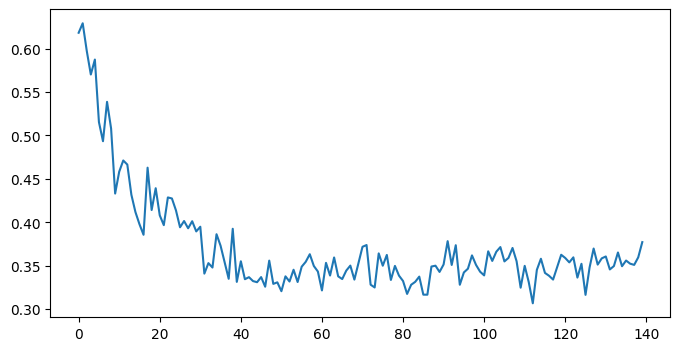

validation error for model_batch 1410: 0.3594736158847809
validation error for model_batch 1420: 0.368370920419693
validation error for model_batch 1430: 0.3823637366294861
validation error for model_batch 1440: 0.3810318112373352
validation error for model_batch 1450: 0.34975072741508484
validation error for model_batch 1460: 0.36193379759788513
validation error for model_batch 1470: 0.35227978229522705
validation error for model_batch 1480: 0.3477427065372467
validation error for model_batch 1490: 0.3384176194667816
validation error for model_batch 1500: 0.3853171169757843


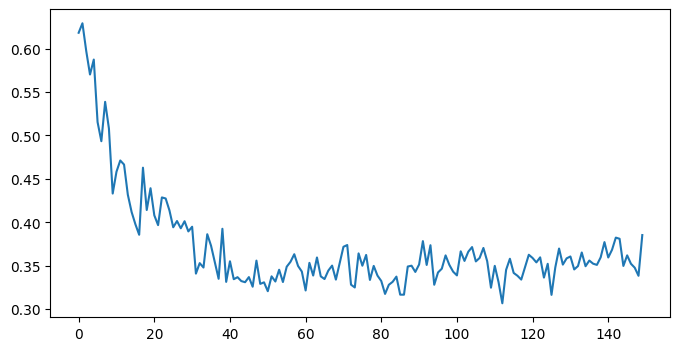

validation error for model_batch 1510: 0.3538719415664673
validation error for model_batch 1520: 0.35129988193511963
validation error for model_batch 1530: 0.34892624616622925
validation error for model_batch 1540: 0.3413439989089966
validation error for model_batch 1550: 0.3472287952899933
validation error for model_batch 1560: 0.351898193359375
validation error for model_batch 1570: 0.3508126735687256
validation error for model_batch 1580: 0.3792615830898285
validation error for model_batch 1590: 0.3654482364654541
validation error for model_batch 1600: 0.3479454815387726


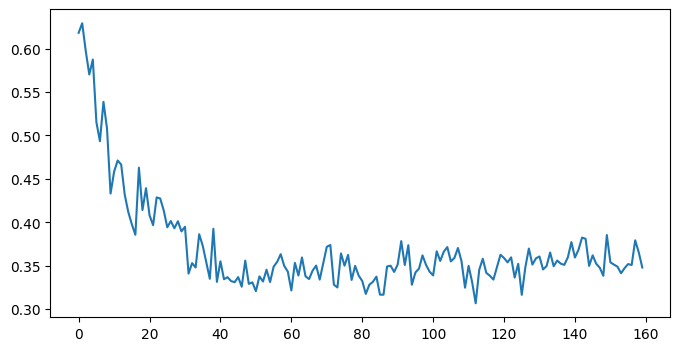

validation error for model_batch 1610: 0.3728860020637512
validation error for model_batch 1620: 0.3740101158618927
validation error for model_batch 1630: 0.3739951550960541
validation error for model_batch 1640: 0.36514270305633545
validation error for model_batch 1650: 0.3644680678844452
validation error for model_batch 1660: 0.3660911023616791
validation error for model_batch 1670: 0.37991034984588623
validation error for model_batch 1680: 0.37011265754699707
validation error for model_batch 1690: 0.34979501366615295
validation error for model_batch 1700: 0.37908050417900085


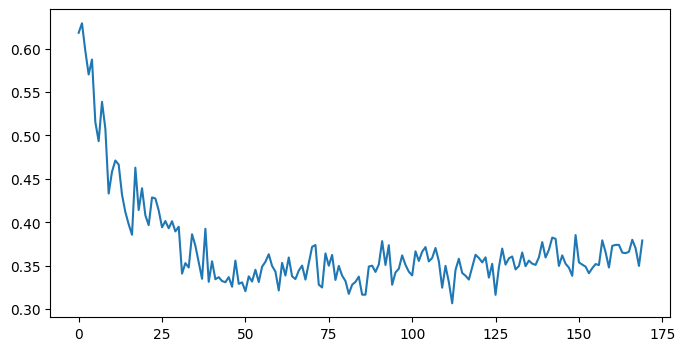

validation error for model_batch 1710: 0.3764931857585907
validation error for model_batch 1720: 0.3559691309928894
validation error for model_batch 1730: 0.36040928959846497
validation error for model_batch 1740: 0.3713792860507965
validation error for model_batch 1750: 0.37636008858680725
validation error for model_batch 1760: 0.36245518922805786
validation error for model_batch 1770: 0.37774765491485596
validation error for model_batch 1780: 0.3697856366634369
validation error for model_batch 1790: 0.3824937045574188
validation error for model_batch 1800: 0.3660201132297516


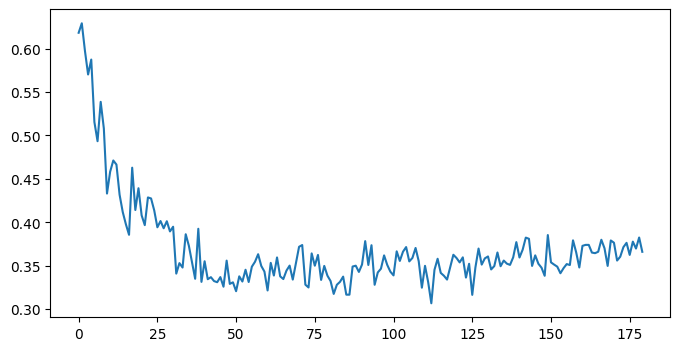

validation error for model_batch 1810: 0.3771090507507324
validation error for model_batch 1820: 0.36050623655319214
validation error for model_batch 1830: 0.407013863325119
validation error for model_batch 1840: 0.39569148421287537
validation error for model_batch 1850: 0.38881736993789673
validation error for model_batch 1860: 0.38536980748176575
validation error for model_batch 1870: 0.3884115219116211
validation error for model_batch 1880: 0.3786940276622772
validation error for model_batch 1890: 0.4030504524707794
validation error for model_batch 1900: 0.3691102862358093


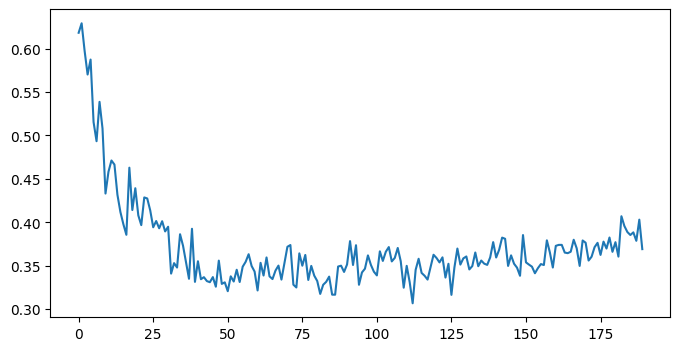

validation error for model_batch 1910: 0.40735024213790894
validation error for model_batch 1920: 0.3903496265411377
validation error for model_batch 1930: 0.40595972537994385
validation error for model_batch 1940: 0.38177603483200073
validation error for model_batch 1950: 0.3802033066749573
validation error for model_batch 1960: 0.40354034304618835
validation error for model_batch 1970: 0.35980114340782166
validation error for model_batch 1980: 0.3899165093898773
validation error for model_batch 1990: 0.38744571805000305
validation error for model_batch 2000: 0.37889188528060913


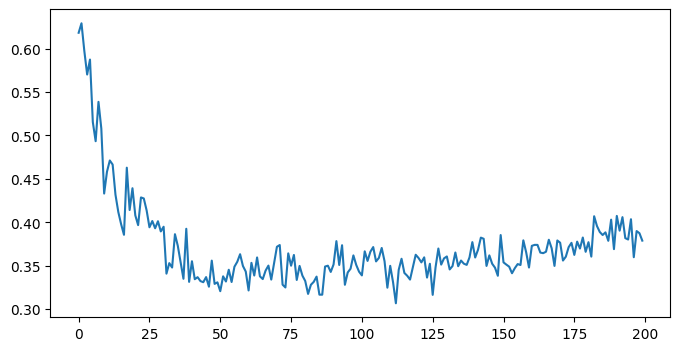

validation error for model_batch 2010: 0.38662242889404297
validation error for model_batch 2020: 0.3984276354312897
validation error for model_batch 2030: 0.3727116286754608
validation error for model_batch 2040: 0.3734839856624603


KeyboardInterrupt: 

In [5]:
while True:

    # wait for new model
    while True:
        try:
            model_saves = os.listdir('../Monte Carlo/Model Saves MC v27')
            model_inds = [int(i[6:-8]) for i in model_saves]
            model_inds.sort()
        except:
            time.sleep(0.05)
            continue
        next_ind = curr_ind
        for ind in model_inds:
            if ind > curr_ind and ind % 10 == 0:
                next_ind = ind
                break
        if next_ind > curr_ind:
            break
        else:
            time.sleep(0.05)

    curr_ind = next_ind

    model = Model_v27()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v27/model_{}_batches'.format(curr_ind)))

    # validation_error_list = []

    meta_games = []
    meta_boards_white = []; meta_boards_black = []
    i = 0

    meta_active = []

    for game_ind in range(n_games):
        meta_games.append( Game() )
        meta_boards_white.append([]); meta_boards_black.append([])
        meta_active.append(True)

    model.eval()

    while True in meta_active:

        i += 1
        full_board_batch = []
        meta_board_batch_sizes = [] # save batch sizes to split model output afterwards
        meta_moves = []

        # go through games, collect positions for value evaluations
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                meta_board_batch_sizes.append(0)
                meta_moves.append([])
                continue

            meta_moves.append(game.PossibleMoves())
            game_ini = game.copy()
            board_batch = []
            mate = False

            for move in meta_moves[-1]:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    break
                game = game_ini.copy()

            meta_games[g] = game.copy()

            if mate:
                meta_active[g] = False
                meta_board_batch_sizes.append(0)
                game.FlipBoard()
                if i % 2 == 1:
                    meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
                if i % 2 == 0:
                    meta_boards_black[g].append(board_to_bool_tensor(game.pieces))

            if not mate:
                full_board_batch = full_board_batch + board_batch
                meta_board_batch_sizes.append(len(board_batch))

        # if i == 100:
        #     print(i, ': ', sum(1 for i in meta_active if i))
        if i == 1:
            hist_active_1.append(sum(1 for i in meta_active if i))
        if i == 20:
            hist_active_20.append(sum(1 for i in meta_active if i))
        if i == 50:
            hist_active_50.append(sum(1 for i in meta_active if i))
        if i == 100:
            hist_active_100.append(sum(1 for i in meta_active if i))
        if i == 150:
            hist_active_150.append(sum(1 for i in meta_active if i))

        if len(full_board_batch) == 0:
            break

        # get values of all positions
        full_board_batch = torch.stack(full_board_batch)
        out = model(full_board_batch).detach()
        meta_values = torch.split(out, meta_board_batch_sizes)

        # make moves for all games
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                continue

            if i <= n_random_moves * 2: # n_random_moves is per player -> *2
                chosen_ind = np.random.choice(range(len(meta_moves[g])))
                chosen_move = meta_moves[g][chosen_ind]

            else:
                values = meta_values[g]
                max_ind = torch.argmax(values).item()
                chosen_move = meta_moves[g][max_ind]

            game.PlayMove(chosen_move)
            if i % 2 == 1:
                meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
            if i % 2 == 0:
                meta_boards_black[g].append(board_to_bool_tensor(game.pieces))
            game.FlipBoard()

    if len(hist_active_1) > len(hist_active_20):
        hist_active_20.append(0)
    if len(hist_active_1) > len(hist_active_50):
        hist_active_50.append(0)
    if len(hist_active_1) > len(hist_active_100):
        hist_active_100.append(0)
    if len(hist_active_1) > len(hist_active_150):
        hist_active_150.append(0)

    meta_inputs = []
    meta_labels = []

    for g, game in enumerate(meta_games):
        
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1
            continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(meta_boards_white[g]) - 1 - i) for i in range(len(meta_boards_white[g]))]
        labels_black = [reward_black * gamma**(len(meta_boards_black[g]) - 1 - i) for i in range(len(meta_boards_black[g]))]

        meta_inputs = meta_inputs + meta_boards_white[g] + meta_boards_black[g]
        meta_labels = meta_labels + labels_white + labels_black

    inputs_tens = torch.stack(meta_inputs)
    labels_tens = torch.Tensor(meta_labels)

    values_tens = model(inputs_tens).detach()

    validation_error = criterion(labels_tens.flatten(), values_tens.flatten())
    validation_error_list.append(validation_error)

    print('validation error for model_batch {}: {}'.format(curr_ind, validation_error))
    # print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    torch.save(validation_error_list, 'validation_errors_v27')

    if  len(validation_error_list) % 10 == 0 and len(validation_error_list) > 0:
        plt.figure(figsize=(8, 4))
        plt.plot(validation_error_list)
        plt.show()
        
        # plt.figure(figsize=(8, 4))
        # plt.plot(hist_active_1, label='active at i=1')
        # plt.plot(hist_active_20, label='active at i=20')
        # plt.plot(hist_active_50, label='active at i=50')
        # plt.plot(hist_active_100, label='active at i=100')
        # plt.plot(hist_active_150, label='active at i=150')
        # plt.legend()
        # plt.show()

In [24]:
print(validation_error_list)

[tensor(0.3129)]


(0.0, 150.0)

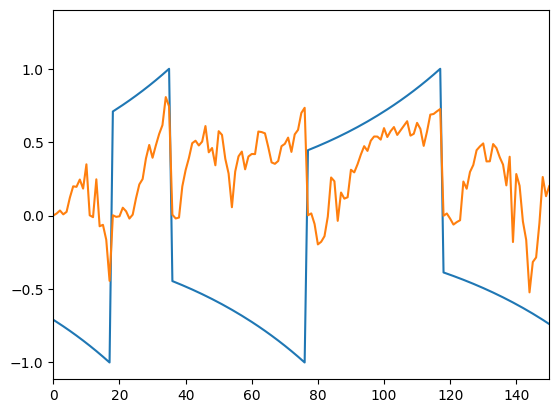

In [14]:
plt.plot(labels_tens)
plt.plot(values_tens)
plt.xlim([0, 150])

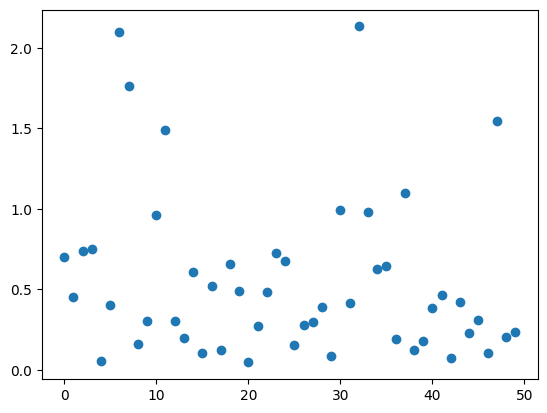

In [51]:
plt.scatter(range(len(validation_error_list)), validation_error_list)
plt.show()

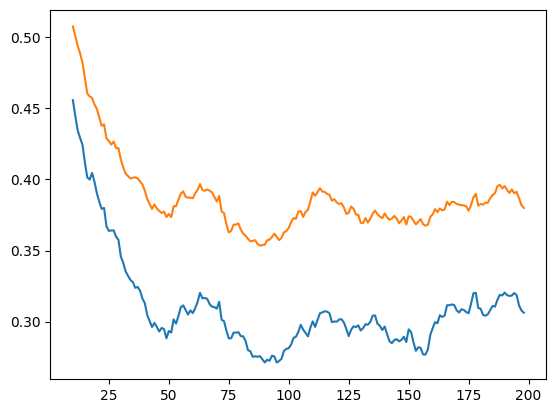

In [40]:
av_window = 20
plt.plot(range(av_window//2, len(val_median_list) - av_window//2), [np.nanmean(val_median_list[i:(i+av_window)]) for i in range(len(val_median_list) - av_window)], label='median')
plt.plot(range(av_window//2, len(val_mean_list) - av_window//2), [np.nanmean(val_mean_list[i:(i+av_window)]) for i in range(len(val_mean_list) - av_window)], label='mean')
        
plt.show()

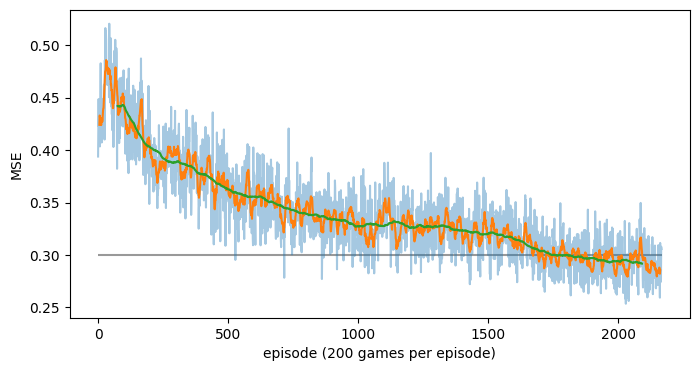

In [41]:
error_hist_v27 = torch.load('error_hist MC v27')
av_windows = [10, 150]
plt.figure(figsize=(8, 4))
plt.hlines(0.3, xmin=0, xmax=len(error_hist_v27), color='black', alpha=0.4)
plt.plot(error_hist_v27, alpha=0.4)
for av in av_windows:
    plt.plot(range(av//2, len(error_hist_v27)-av//2), [np.mean(error_hist_v27[i:i+av]) for i in range(len(error_hist_v27) - av)], alpha=1)
plt.xlabel('episode (200 games per episode)')
plt.ylabel('MSE')
# plt.xlim([2000, 2200])
plt.show()
# plt.plot(error_hist_v27, alpha=0.4)

In [37]:
print(len(error_hist_v27))

2146


In [46]:
epsilon = 2
test_list = [1, 2, 3, 4, 5, 6]
norm_list = [i-np.mean(test_list) for i in test_list]
scaled_norm_list = [(i-np.mean(test_list))*epsilon for i in test_list]

exp_list= [np.exp(i) for i in norm_list]
scaled_exp_list= [np.exp(i) for i in scaled_norm_list]

softmax = [i/(np.sum(exp_list)) for i in exp_list]
scaled_softmax = [i/(np.sum(scaled_exp_list)) for i in scaled_exp_list]

print(softmax)
print(scaled_softmax)


[0.00426977854528211, 0.011606461431184656, 0.03154963320110002, 0.08576079462509835, 0.23312200962361299, 0.6336913225737218]
[3.925595860610245e-05, 0.00029006448035779047, 0.0021433027176708816, 0.015836984017860663, 0.11702036334584057, 0.864670029479664]
